## Problem to address
1. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric).
2. Correlation and ANOVA, if applicable, is a must.
3. A graphical analysis of the additives, including a distribution study.
4. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [1]:
import pandas as pd

In [2]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Jobs/PreScreen_r3/
!ls

/content/gdrive/My Drive/Jobs/PreScreen_r3
1000_histograms.png  palm_ffb_date_f.csv    Q1_ingredients.ipynb
ingredient.csv	     PreScreen_DSAI_r3.pdf
palm_ffb.csv	     PreScreen_r3


In [4]:
df = pd.read_csv('ingredient.csv')


In [5]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [6]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

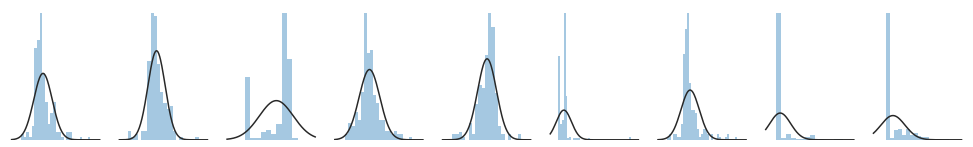

In [10]:
fig, ax = plt.subplots(figsize = (60, 50))
# for n, col in enumerate(df.columns):
#     plt.subplot(25, 40, n+1)
#     df[col].hist(ax = plt.gca())
#     plt.axis('off')
# plt.tight_layout()

#fig, ax = plt.subplots(figsize = (12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(25, 40, i+1)
    sns.distplot(df.iloc[:,i],fit=norm, kde=False,ax=plt.gca())
    plt.axis('off')
plt.tight_layout()

#plt.savefig('1000_histograms.png', bbox_inches='tight', pad_inches = 0, dpi = 200)

>shows additives are skewed and not normally distributed

System: 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
Module pandas     - version 1.3.5
Module numpy      - version 1.21.5
Module scipy      - version 1.4.1
Module seaborn    - version 0.11.2
------------
Columns names probably not a normal dist:
  Column  Not_Normal       p-value   Normality
0      a        True  4.806065e-19  Not Normal
0      b        True  1.360632e-06  Not Normal
0      c        True  1.613377e-08  Not Normal
0      d        True  1.034521e-08  Not Normal
0      e        True  1.622883e-08  Not Normal
0      f        True  4.222522e-67  Not Normal
0      g        True  1.691698e-24  Not Normal
0      h        True  3.192617e-39  Not Normal
0      i        True  2.035388e-17  Not Normal
------------
Plotting countplot


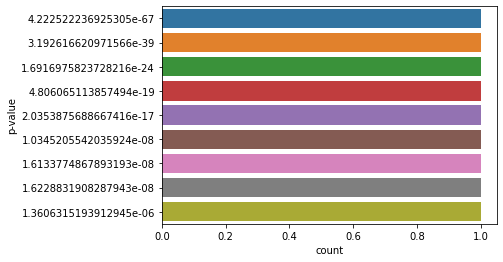

In [11]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sb
import matplotlib.pyplot as plt
import sys

print('System: {}'.format(sys.version))
for module in [pd, np, scipy, sb]:
    print('Module {:10s} - version {}'.format(module.__name__, module.__version__))


alpha = 0.01
df_list = list()

# normality code taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
cat_map = {True: 'Not Normal',
           False: 'Maybe Normal'}
for col in df.columns:
    k2, p = stats.normaltest(df[col])
    is_not_normal = p < alpha
    tmp_df = pd.DataFrame({'Column': [col],
                           'Not_Normal': [is_not_normal],
                           'p-value': [p],
                           'Normality': cat_map[is_not_normal]
                           })
    df_list.append(tmp_df)

df_results = pd.concat(df_list)
df_results['Normality'] = df_results['Normality'].astype('category')

print('------------')
print('Columns names probably not a normal dist:')
# full data
print(df_results[(df_results['Normality'] == 'Not Normal')])
# only column names
# print(df_results[(df_results['Normality'] == 'Not Normal')]['Column'])
print('------------')
print('Plotting countplot')
sb.countplot(data=df_results, y='p-value', orient='v')
plt.show()

In [12]:
df_results

,Column,Not_Normal,p-value,Normality
0,a,True,4.806065e-19,Not Normal
0,b,True,1.360632e-06,Not Normal
0,c,True,1.613377e-08,Not Normal
0,d,True,1.034521e-08,Not Normal
0,e,True,1.622883e-08,Not Normal
0,f,True,4.222522e-67,Not Normal
0,g,True,1.691698e-24,Not Normal
0,h,True,3.192617e-39,Not Normal
0,i,True,2.035388e-17,Not Normal


In [13]:
k2, p = stats.normaltest(df)
alpha = 1e-3
print(p)


[4.80606511e-19 1.36063152e-06 1.61337749e-08 1.03452055e-08
 1.62288319e-08 4.22252224e-67 1.69169758e-24 3.19261662e-39
 2.03538757e-17]


In [14]:
for p in p:
  if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
  else:
    print("The null hypothesis cannot be rejected")
# if p < alpha:  # null hypothesis: x comes from a normal distribution
#     print("The null hypothesis can be rejected")
# else:
#     print("The null hypothesis cannot be rejected")
# The null hypothesis can be rejected

The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected
The null hypothesis can be rejected


# ANOVA test
###  there is not usually too much of an impact to validity from non-normal data; as per Stevens stressed in his 2016 publication of Applied Multivariate Statistics for the Social Sciences

ANOVA Assumptions (https://www.reneshbedre.com/blog/anova.html)

1. Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)

2. homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s or Bartlett’s Test)

3. Observations are sampled independently from each other (no relation in 
observations between the groups and within the groups) i.e., each subject should have only one response

4. The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).





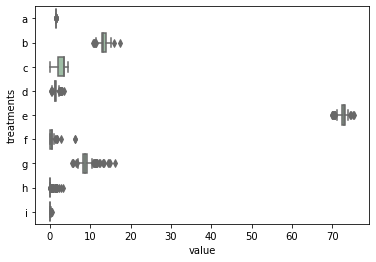

In [15]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=df.columns)
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(y='treatments', x='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(y="treatments", x="value", data=df_melt, color='#7d0013',size=.5)
plt.show()

In [ ]:
%pip install bioinfokit

In [17]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['a'], df['b'], df['c'], df['d'],
                                df['e'], df['f'], df['g'], df['h'], df['i'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)
#                 sum_sq    df         F    PR(>F)
# C(treatments)  3010.95   3.0  17.49281  0.000026
# Residual        918.00  16.0       NaN       NaN

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

# note: if the data is balanced (equal sample size for each group), Type 1, 2, and 3 sums of squares
# (typ parameter) will produce similar results.

168331.96885835085 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),8.0,943261.084445,117907.635556,168331.968858,0.0
Residual,1917.0,1342.757047,0.700447,NaN,NaN


Interpretation
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

#Tukey's HSD test
When the ANOVA is significant, post hoc tests are used to see differences between specific groups. post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. post hoc tests adjust the p values (Bonferroni correction) or critical value (Tukey's HSD test).

In [18]:
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

/usr/local/lib/python3.7/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,a,b,11.889485,11.638239,12.140731,207.817573,0.001000
1,a,c,1.166167,0.914921,1.417413,20.383562,0.001000
2,a,d,0.073459,-0.177787,0.324705,1.283996,0.900000
3,a,e,71.132569,70.881323,71.383815,1243.333736,0.001000
4,a,f,1.021309,0.770063,1.272555,17.851575,0.001000
5,a,g,7.438597,7.187351,7.689843,130.020031,0.001000
6,a,h,1.343319,1.092073,1.594565,23.480010,0.001000
7,a,i,1.461356,1.210110,1.712602,25.543198,0.001000
8,b,c,10.723318,10.472072,10.974564,187.434011,0.001000
9,b,d,11.962944,11.711698,12.214190,209.101568,0.001000


###except a-d and h-i, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences. If we are looking for clustering by additives then a-d as 1 cluster and h-1 as another and remaining can be seen 3rd cluster but need to validate it

#correlation matrix

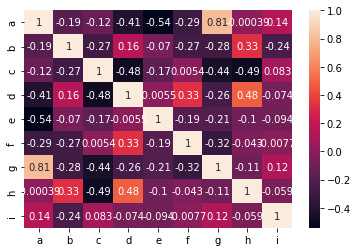

In [ ]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


#### clearly a & g are highly positively corelated and interestingly d,e are highly negatively corelated with a. c is negative with h, g, d 

#Clustering for formulations

In [ ]:
# this is 1 d array for each treatment and hence we cant cluster them, so will use tukey 
#experimetn to create the distance. a-d and h-i are 2 cluster plus 5 remaning distinct clusters
# b,c,e,f,g. if we want futher decrease in cluster even f n h plus i n f can be combined.

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

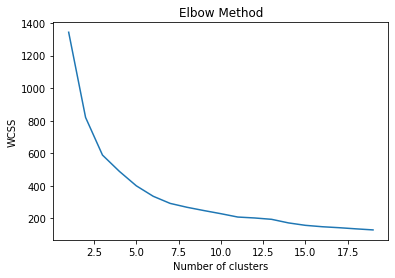

In [22]:
X=df.copy()
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##KMEANS

In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

In [24]:
df['predictions1'] = pd.DataFrame(pred_y)

In [25]:
df

,a,b,c,d,e,f,g,h,i,predictions1
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,1
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,1


##HCLUST

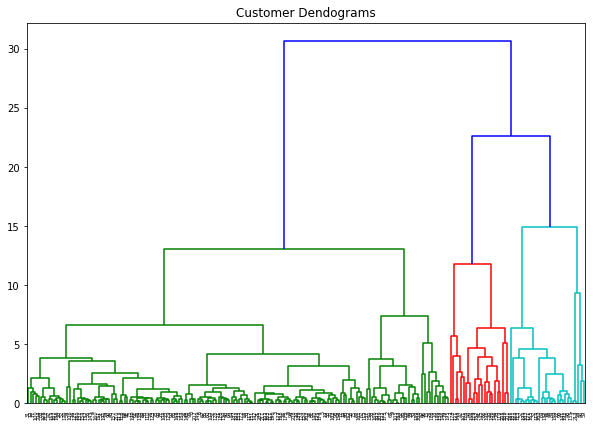

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

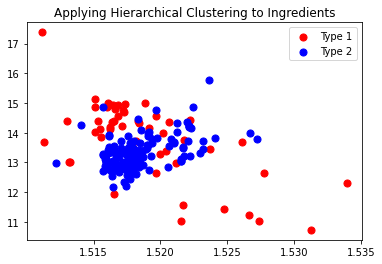

In [28]:
from sklearn.cluster import AgglomerativeClustering 

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 50, c = 'blue', label = 'Type 2')
#plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 50, c = 'green', label = 'Type 3')
plt.title('Applying Hierarchical Clustering to Ingredients')

plt.legend()
plt.show()

In [29]:
## from threshold somewhere 11 i see 5 clusters

##the next step is to group the data points into these five clusters. To do so we will again use the AgglomerativeClustering class of the sklearn.cluster library. 

In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Applying Hierarchical Clustering to Ingredients')

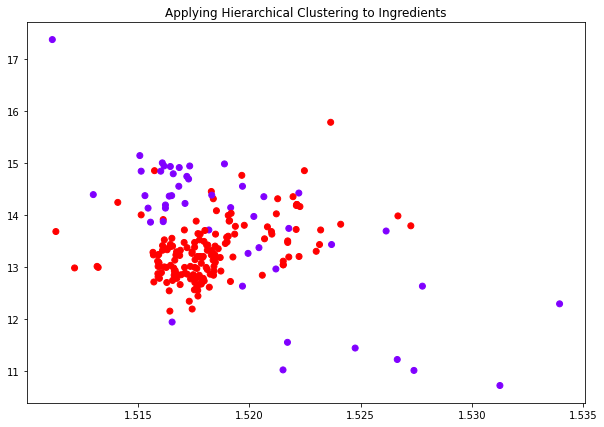

In [33]:

plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Applying Hierarchical Clustering to Ingredients')


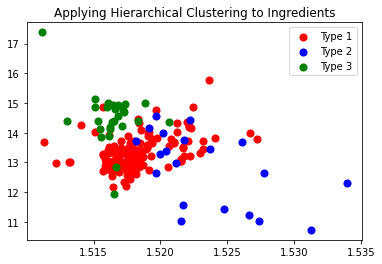

In [ ]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 50, c = 'red', label = 'Type 1')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 50, c = 'blue', label = 'Type 2')
plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 50, c = 'green', label = 'Type 3')
plt.title('Applying Hierarchical Clustering to Ingredients')

plt.legend()
plt.show()

###DB Scan

In [ ]:
df1 = pd.read_csv('ingredient.csv')


In [ ]:
# Compute DBSCAN
X=df1
#num_classes = len(cluster_centers)
epsilon = 1


min_samples = 5

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)



Estimated no. of clusters: 4
Estimated no. of noise points: 40


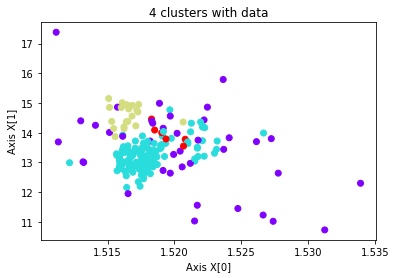

In [ ]:
X=df1
# Generate scatter plot for training data
#colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=db.labels_, cmap='rainbow')#, picker=True)
plt.title('4 clusters with data')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()



In [ ]:
df['predict_HC']= hc.fit_predict(X)
df

,a,b,c,d,e,f,g,h,i,predictions1,predict_HC
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1,1
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,1,1
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1,1
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,1,1


In [ ]:
df['predict_DB']= db.labels_

In [ ]:
pd.crosstab(df.predict_DB, df.predict_HC,margins=True, margins_name="Total")


predict_HC,0,1,2,Total
predict_DB,,,,
-1,8,9,23,40
0,0,147,0,147
1,21,0,0,21
2,0,6,0,6
Total,29,162,23,214


4 CLusters seems ok but there is some noise as can be seen as cluster 0 with purple color in last chart above

